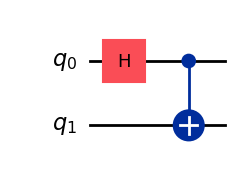

In [27]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

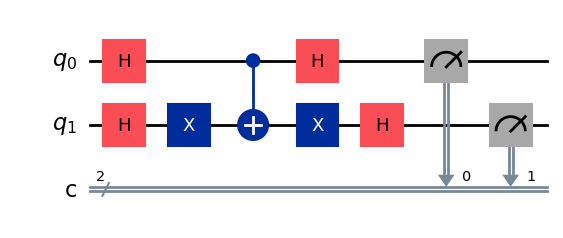

In [23]:
# # Create a Quantum Circuit with 2 qubits and 2 classical bits
# qc = QuantumCircuit(2, 2)

# # Apply Hadamard gates to both qubits
# qc.h([0, 1])

# # Apply the oracle (X gate to qubit 1)
# qc.x(1)

# # Apply a CNOT gate with qubit 0 as control and qubit 1 as target
# qc.cx(0, 1)

# # Apply the oracle (X gate to qubit 1)
# qc.x(1)

# # Apply Hadamard gates to both qubits
# qc.h([0, 1])

# # Measure the qubits
# qc.measure([0, 1], [0, 1])

# # Draw the circuit
# qc.draw('mpl')

In [37]:
# Set up six different observables.
from qiskit.quantum_info import SparsePauliOp
 
observables_labels = ["ZZ", "ZI", "IZ", "XX", "XI", "IX"]
observables = [SparsePauliOp(label) for label in observables_labels]

observables

[SparsePauliOp(['ZZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XX'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IX'],
               coeffs=[1.+0.j])]

In [38]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc]*len(observables), observables)
job.result()

EstimatorResult(values=array([ 1.        , -0.0390625 , -0.0390625 ,  1.        , -0.04296875,
       -0.04296875]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0034544, 'sample_measure_time': 0.0009696, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 7563, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.99847412109375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0034544, 'sample_measure_time': 0.0009696

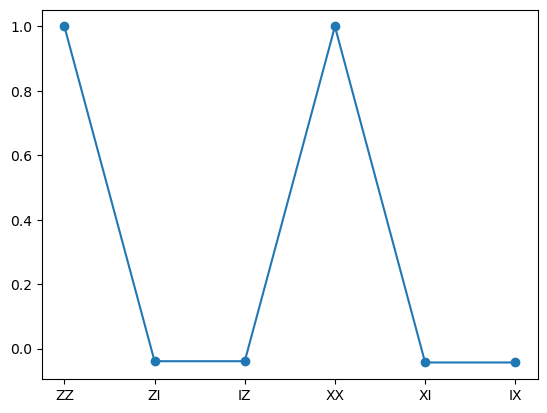

In [39]:
# post-processing
import matplotlib.pyplot as plt

values = job.result().values

plt.plot(observables_labels, values, '-o')

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Measurement outcomes: {'11': 496, '00': 504}


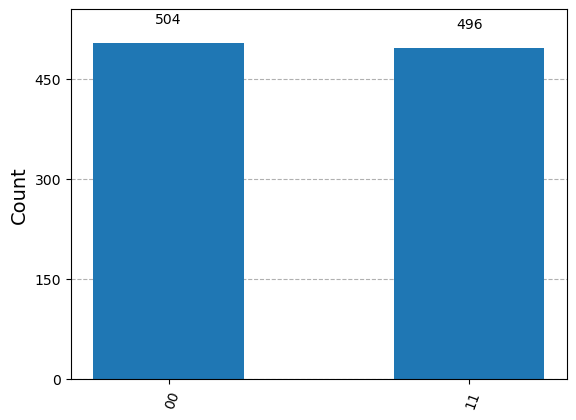

In [41]:
# Quantum Computing with Qiskit: Introduction and Basic Circuits

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate to the first qubit
qc.h(0)

# Apply a CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Print the circuit
print(qc)

# Create a simulator
simulator = AerSimulator()

# Run the quantum circuit on the simulator backend
job = simulator.run(qc, shots=1000)

# Get the results of the simulation
result = job.result()

# Get the counts of measurement outcomes
counts = result.get_counts(qc)

# Print the results
print("\nMeasurement outcomes:", counts)

# Visualize the results
plot_histogram(counts)